**Assignment**

> Name-kajal


>Reg.no.-21BAC10039

> Course - deep learning

Topic- Rainfall prediction  










In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
from subprocess import check_output
df = pd.read_csv('rainfall in india 1901-2015.csv')

In [ ]:
df.info()
df.dropna(how='any', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [ ]:
subdivs = df['SUBDIVISION'].unique()
num_of_subdivs = subdivs.size
print('Total # of Subdivs: ' + str(num_of_subdivs))
subdivs

Total # of Subdivs: 36


array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

SUBDIVISION
ARUNACHAL PRADESH    3418.857143
COASTAL KARNATAKA    3408.409649
KONKAN & GOA         2977.686087
Name: ANNUAL, dtype: float64
SUBDIVISION
HARYANA DELHI & CHANDIGARH    530.496522
SAURASHTRA & KUTCH            495.161739
WEST RAJASTHAN                292.673043
Name: ANNUAL, dtype: float64


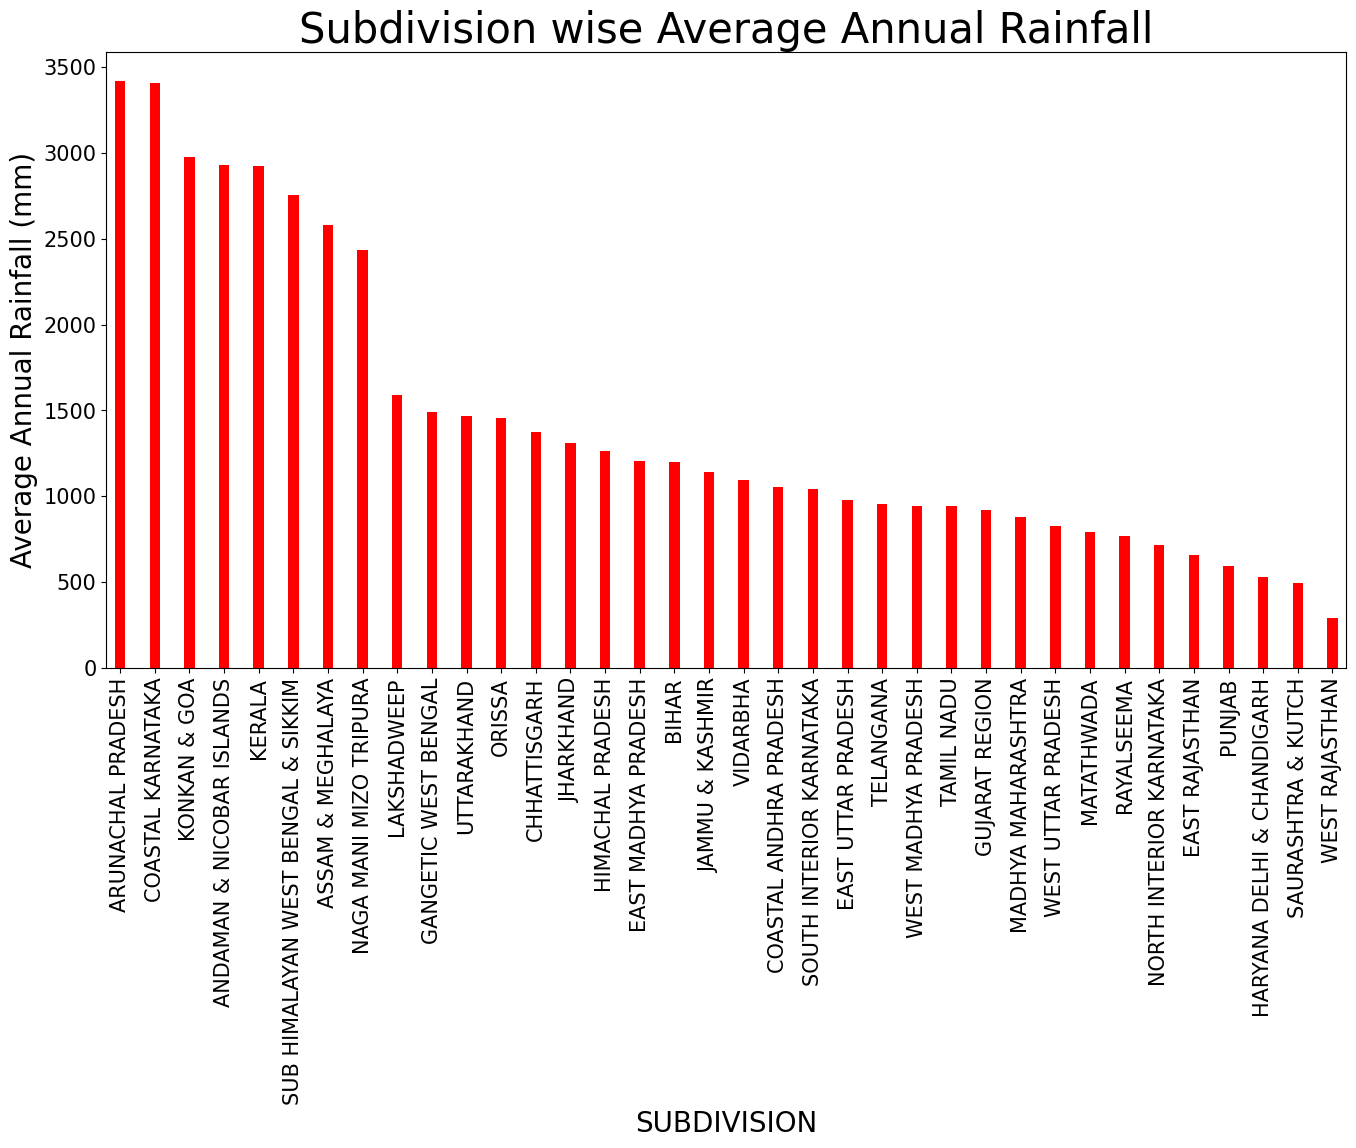

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'].plot(kind='bar', color='r',width=0.3,title='Subdivision wise Average Annual Rainfall', fontsize='15')
plt.xticks(rotation = 90)
plt.ylabel('Average Annual Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print(df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[0,1,2]])
print(df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[33,34,35]])

<ipython-input-13-1ada436430f8>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfg = df.groupby('YEAR').sum()['ANNUAL']


Max: 61815.6 ocurred in [1961]
Max: 41273.6 ocurred in [1972]
Mean: 50182.83826086956


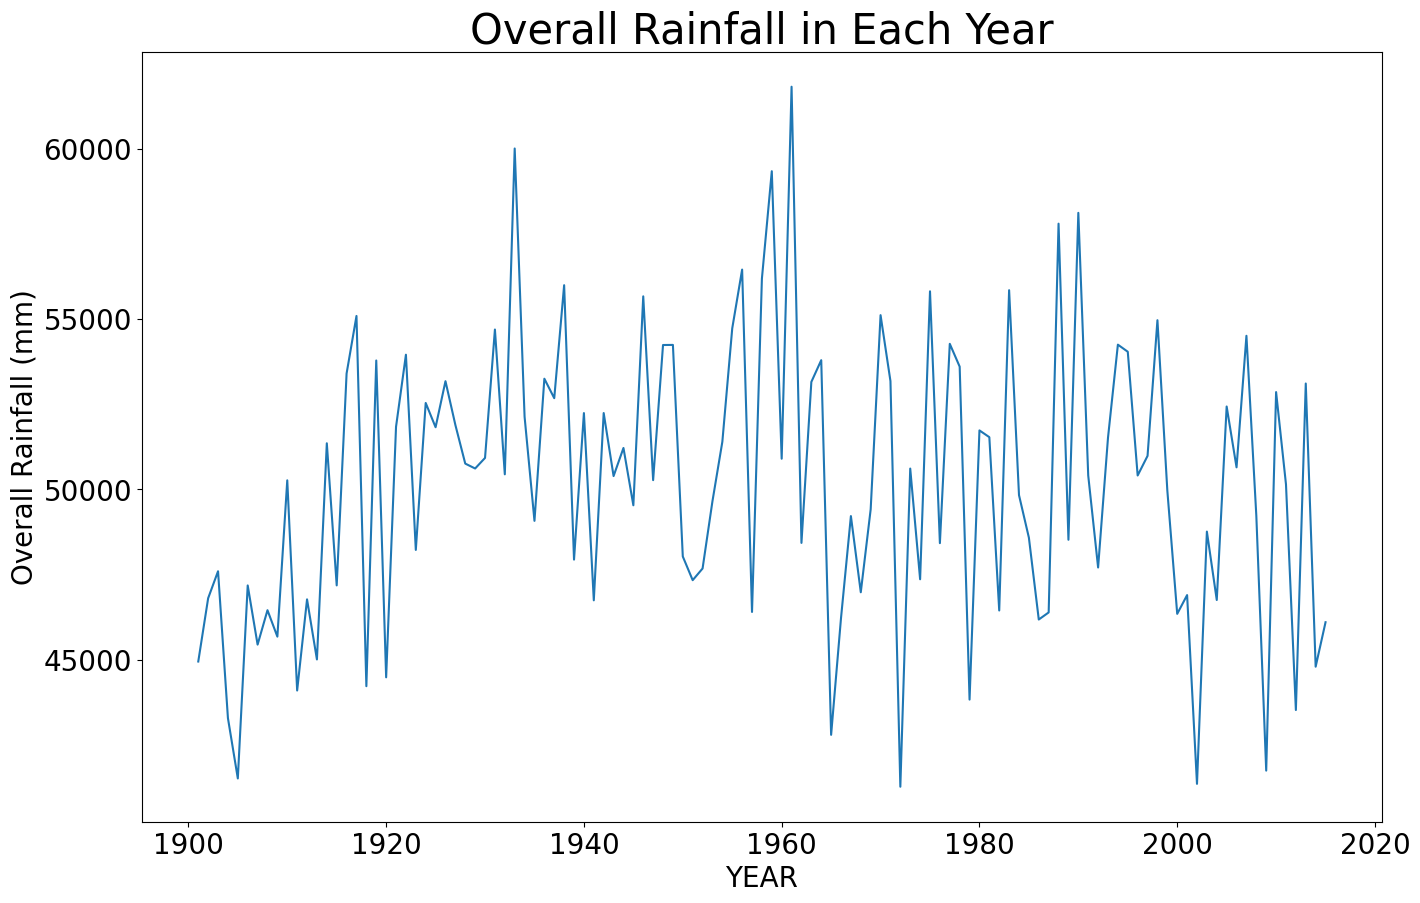

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df.groupby('YEAR').sum()['ANNUAL']
dfg.plot(kind='line', title='Overall Rainfall in Each Year', fontsize=20)
#df.groupby('YEAR').sum()['ANNUAL'].plot()
#plt.xlim(0, 115)
#plt.xticks(np.linspace(0,115,24,endpoint=True),np.linspace(1900,2015,24,endpoint=True).astype(int))
#plt.xticks(np.linspace(1901,2015,24,endpoint=True))
#plt.xticks(rotation = 90)
plt.ylabel('Overall Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

Max: 348.5675046813728 ocurred in ['JUL']
Max: 19.111370590830433 ocurred in ['JAN']
Mean: 118.95843815772808


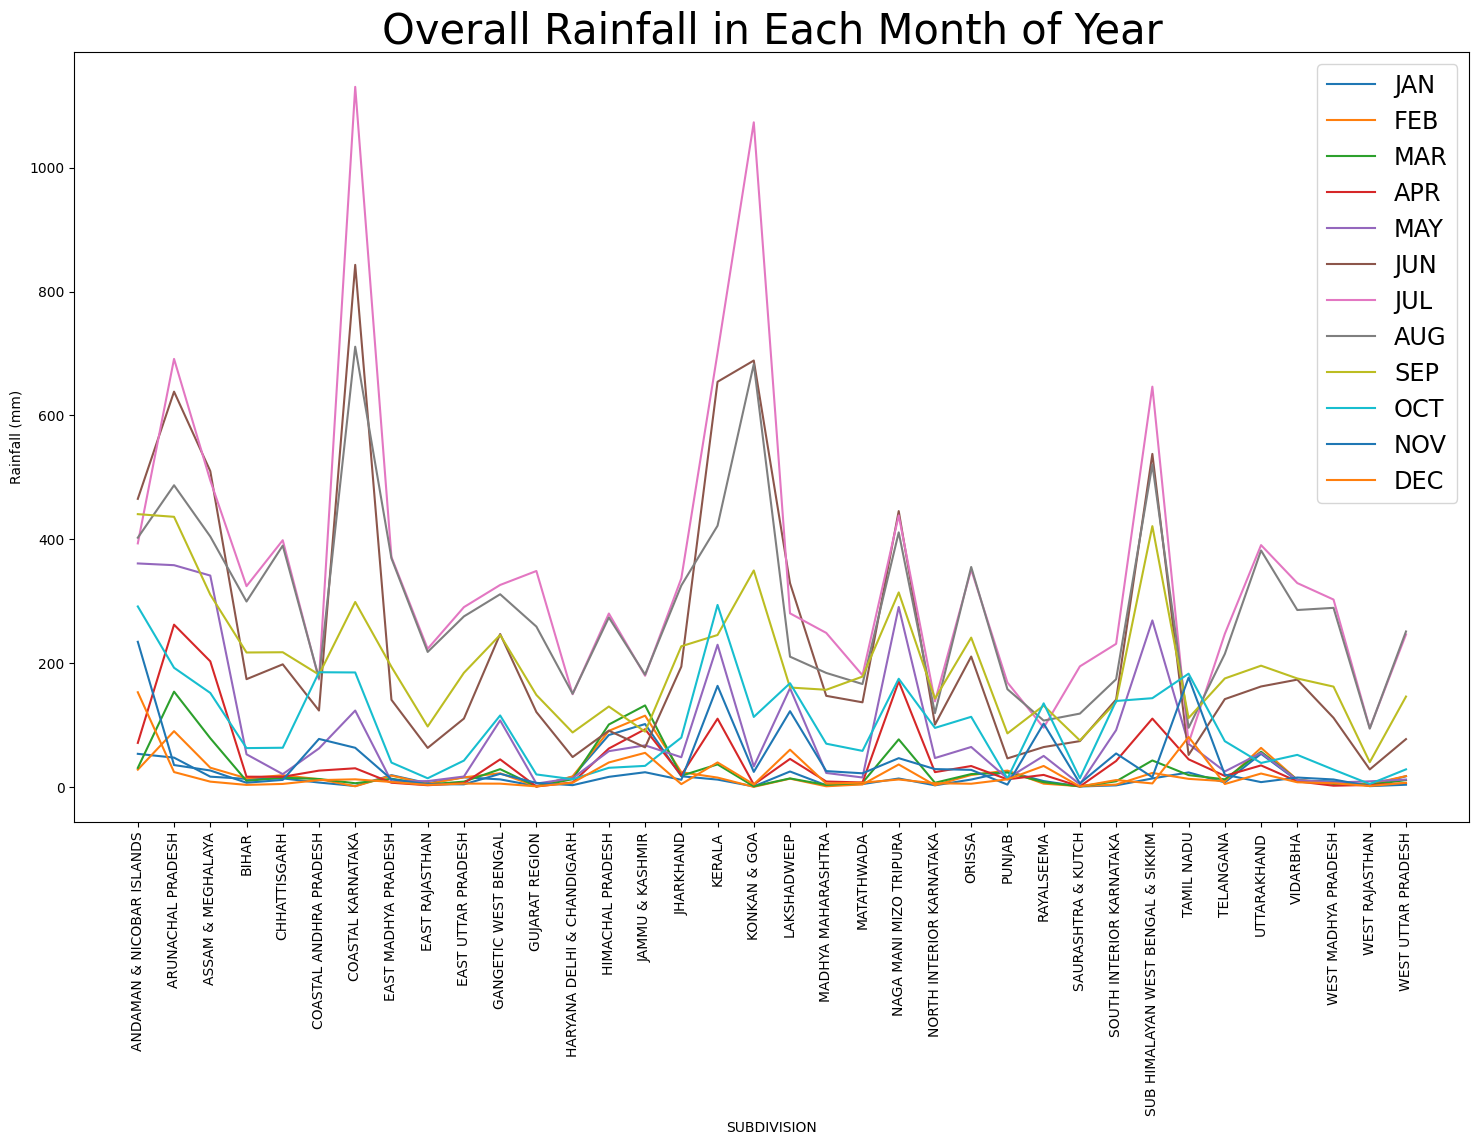

In [ ]:
months = df.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
xlbls = df['SUBDIVISION'].unique()
xlbls.sort()
dfg = df.groupby('SUBDIVISION').mean()[months]
dfg.plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=10)
plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'xx-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)

dfg = dfg.mean(axis=0)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

<ipython-input-15-0fb49345a15c>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('YEAR').mean()[months].plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)


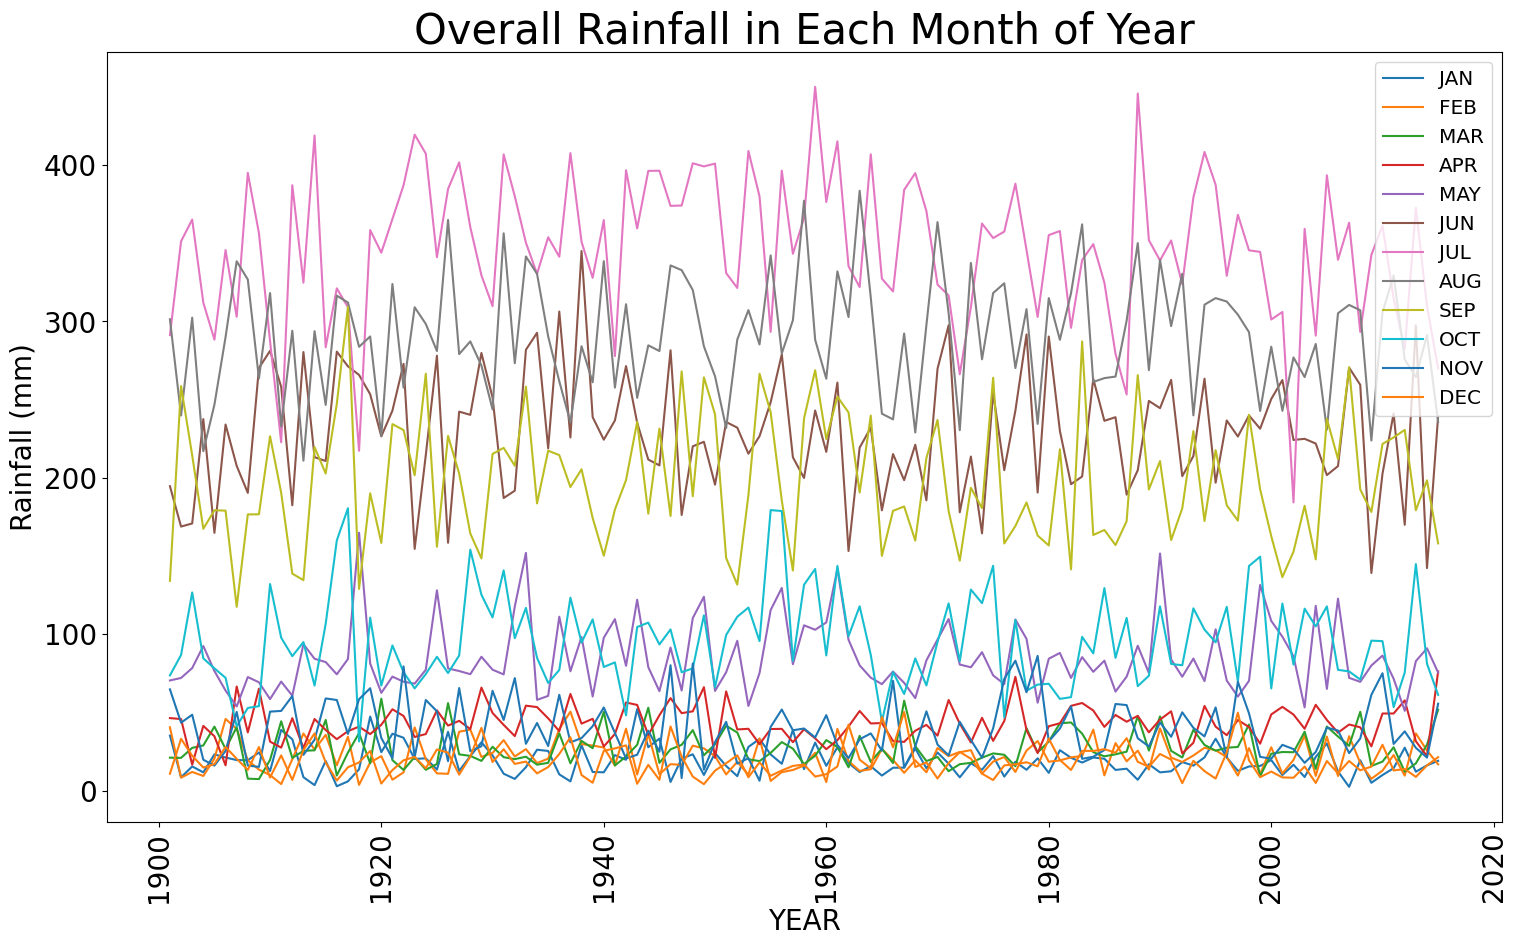

In [ ]:
months = df.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df.groupby('YEAR').mean()[months].plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
#plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'x-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

<ipython-input-16-ad50e10c4a44>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3)
<ipython-input-16-ad50e10c4a44>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3)
<ipython-input-16-ad50e10c4a44>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3)
<ipython-input-16-ad50e10c4a44>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3)
<ipython-input-16-ad50e10c4a44>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3)
<ipython-input-16-ad50e10c4a44>:8: Futur

MAD (Training Data): 93.3449516321858
MAD (Test Data): 94.86214722801965


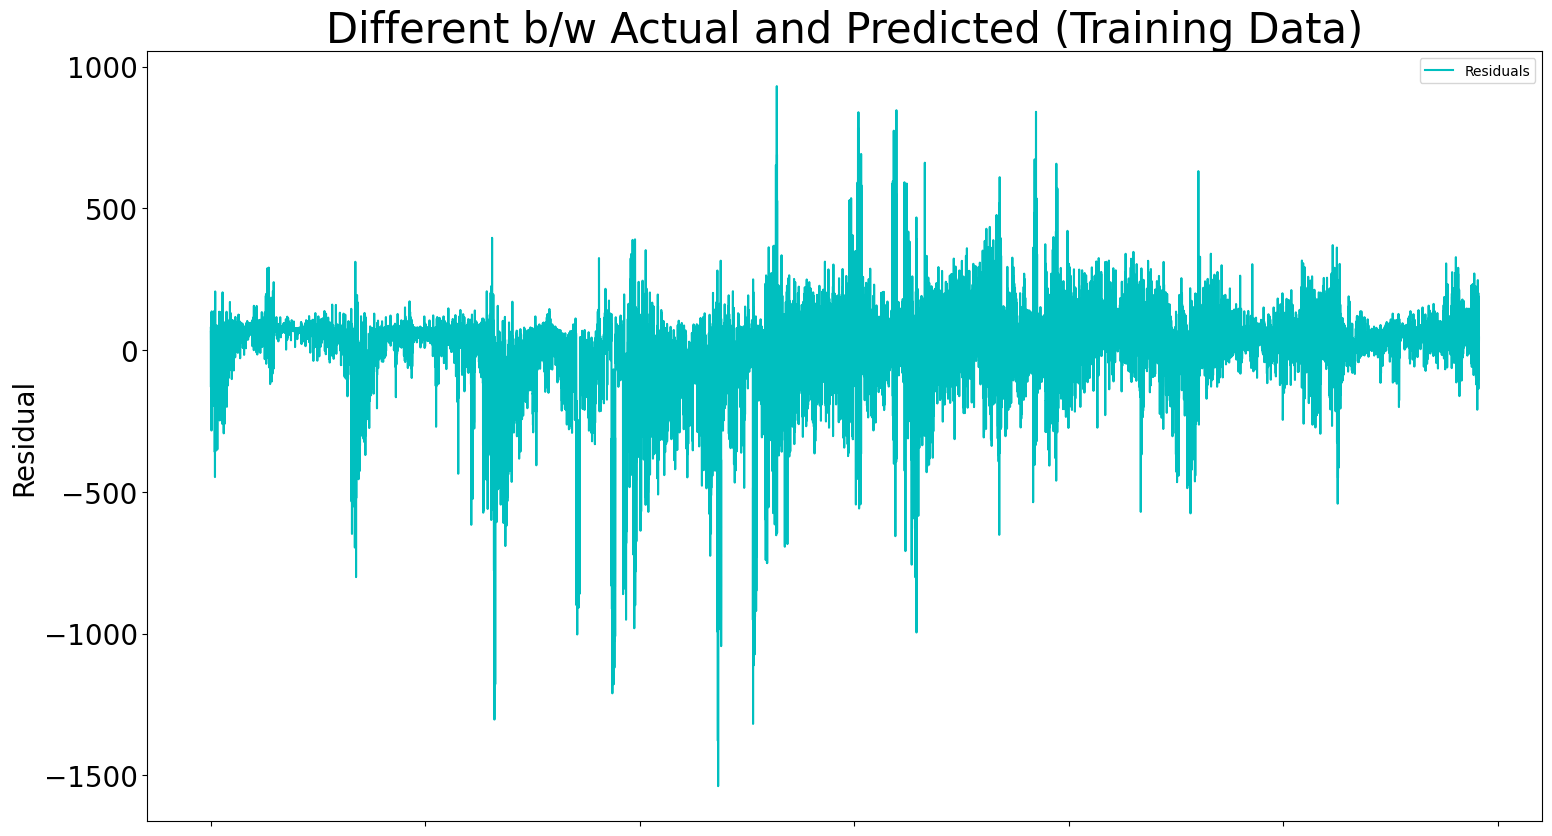

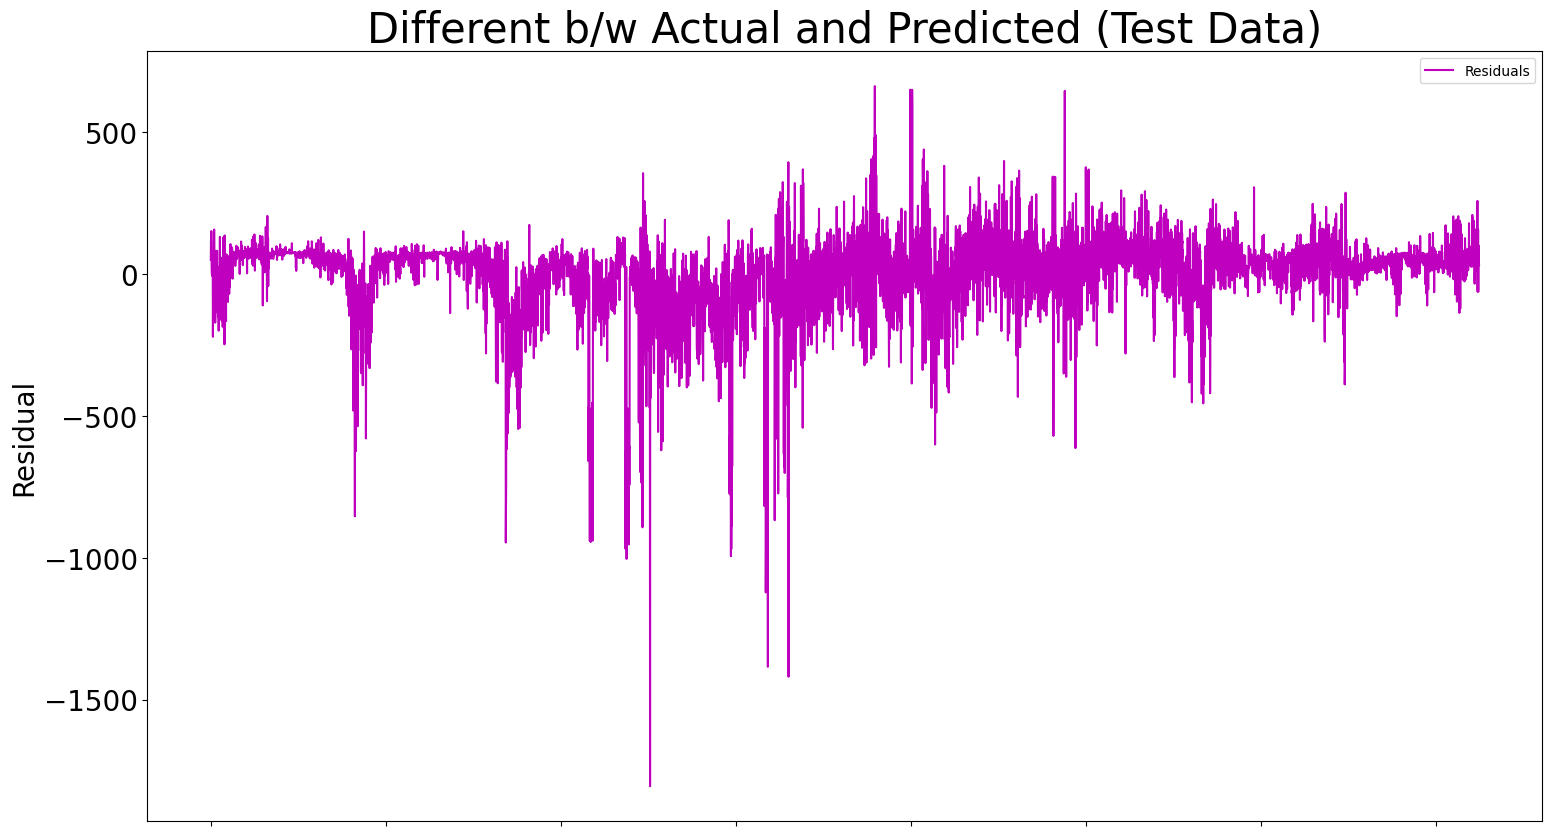

In [ ]:

df2 = df[['SUBDIVISION',months[0],months[1],months[2],months[3]]]
#df2 = df['YEAR','JAN','FEB','MAR','APR']
df2.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])

for k in range(1,9):
    df3 = df[['SUBDIVISION',months[k],months[k+1],months[k+2],months[k+3]]]
    df3.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])
    df2 = df2.append(df3)
df2.index = range(df2.shape[0])

#df2 = pd.concat([df2, pd.get_dummies(df2['SUBDIVISION'])], axis=1)

df2.drop('SUBDIVISION', axis=1,inplace=True)
#print(df2.info())
msk = np.random.rand(len(df2)) < 0.8

df_train = df2[msk]
df_test = df2[~msk]
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])

reg = linear_model.LinearRegression()
reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
predicted_values = reg.predict(df_train.drop('x4',axis=1))
residuals = predicted_values-df_train['x4'].values
print('MAD (Training Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted (Training Data)', color = 'c', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

predicted_values = reg.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
print('MAD (Test Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted (Test Data)', color='m', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

<ipython-input-20-fb2b3b4405dd>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3)
<ipython-input-20-fb2b3b4405dd>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3)
<ipython-input-20-fb2b3b4405dd>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3)
<ipython-input-20-fb2b3b4405dd>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3)
<ipython-input-20-fb2b3b4405dd>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3)
<ipython-input-20-fb2b3b4405dd>:8: Futur

MAD (Training Data): 88.5378737626294


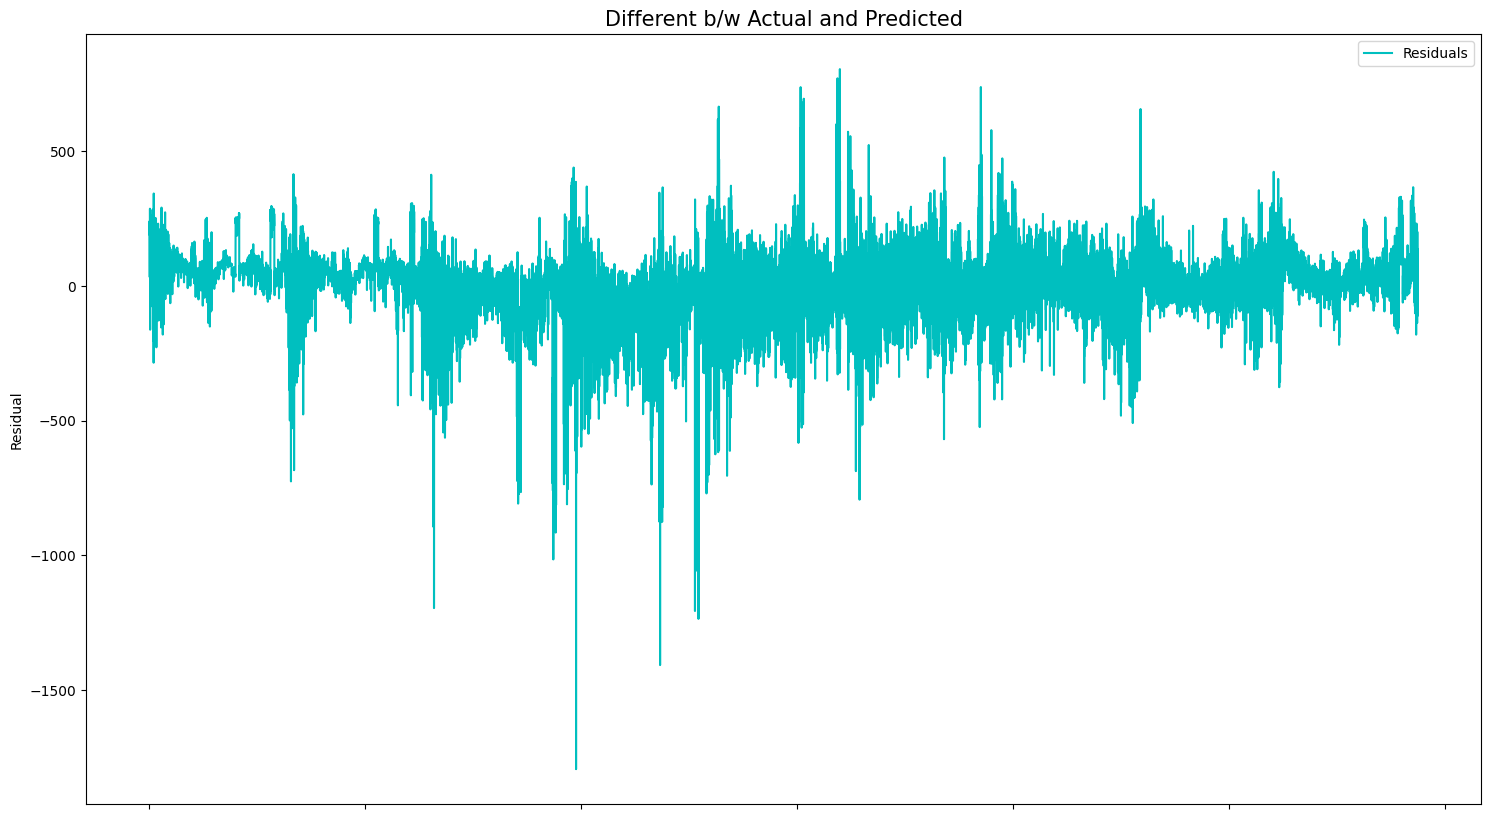

In [ ]:
df2 = df[['SUBDIVISION',months[0],months[1],months[2],months[3]]]

df2.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])

for k in range(1,9):
    df3 = df[['SUBDIVISION',months[k],months[k+1],months[k+2],months[k+3]]]
    df3.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])
    df2 = df2.append(df3)
df2.index = range(df2.shape[0])
df2 = pd.concat([df2, pd.get_dummies(df2['SUBDIVISION'])], axis=1)


df2.drop('SUBDIVISION', axis=1,inplace=True)

msk = np.random.rand(len(df2)) < 0.8

df_train = df2[msk]
df_test = df2[~msk]
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])

reg = linear_model.LinearRegression()
reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
#print(reg.coef_)
predicted_values = reg.predict(df_train.drop('x4',axis=1))
residuals = predicted_values-df_train['x4'].values
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']
print('MAD (Training Data): ' + str(np.mean(np.abs(residuals))))

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted', color = 'c', ax=ax,fontsize=10)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(15)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)

MAD (Test Data): 87.4666920368741


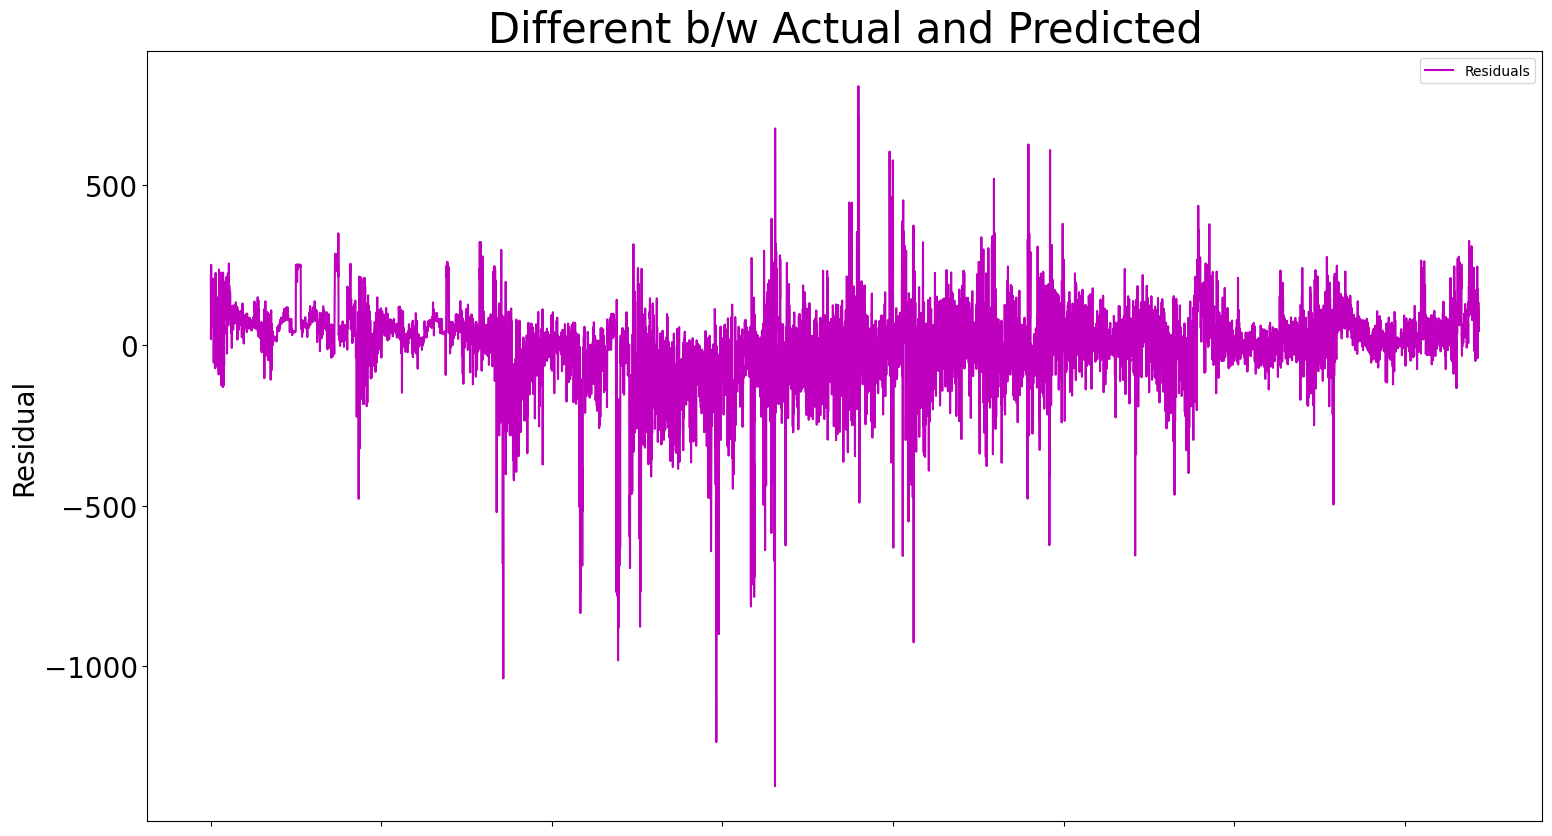

In [ ]:
predicted_values = reg.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']
print('MAD (Test Data): ' + str(np.mean(np.abs(residuals))))

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted', color='m', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

<ipython-input-24-f07e40fc25c8>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3)
<ipython-input-24-f07e40fc25c8>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3)
<ipython-input-24-f07e40fc25c8>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3)
<ipython-input-24-f07e40fc25c8>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3)
<ipython-input-24-f07e40fc25c8>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3)
<ipython-input-24-f07e40fc25c8>:17:

Overall MAD (Training): 87.12448920522493
Overall MAD (Testing): 83.99347847844217


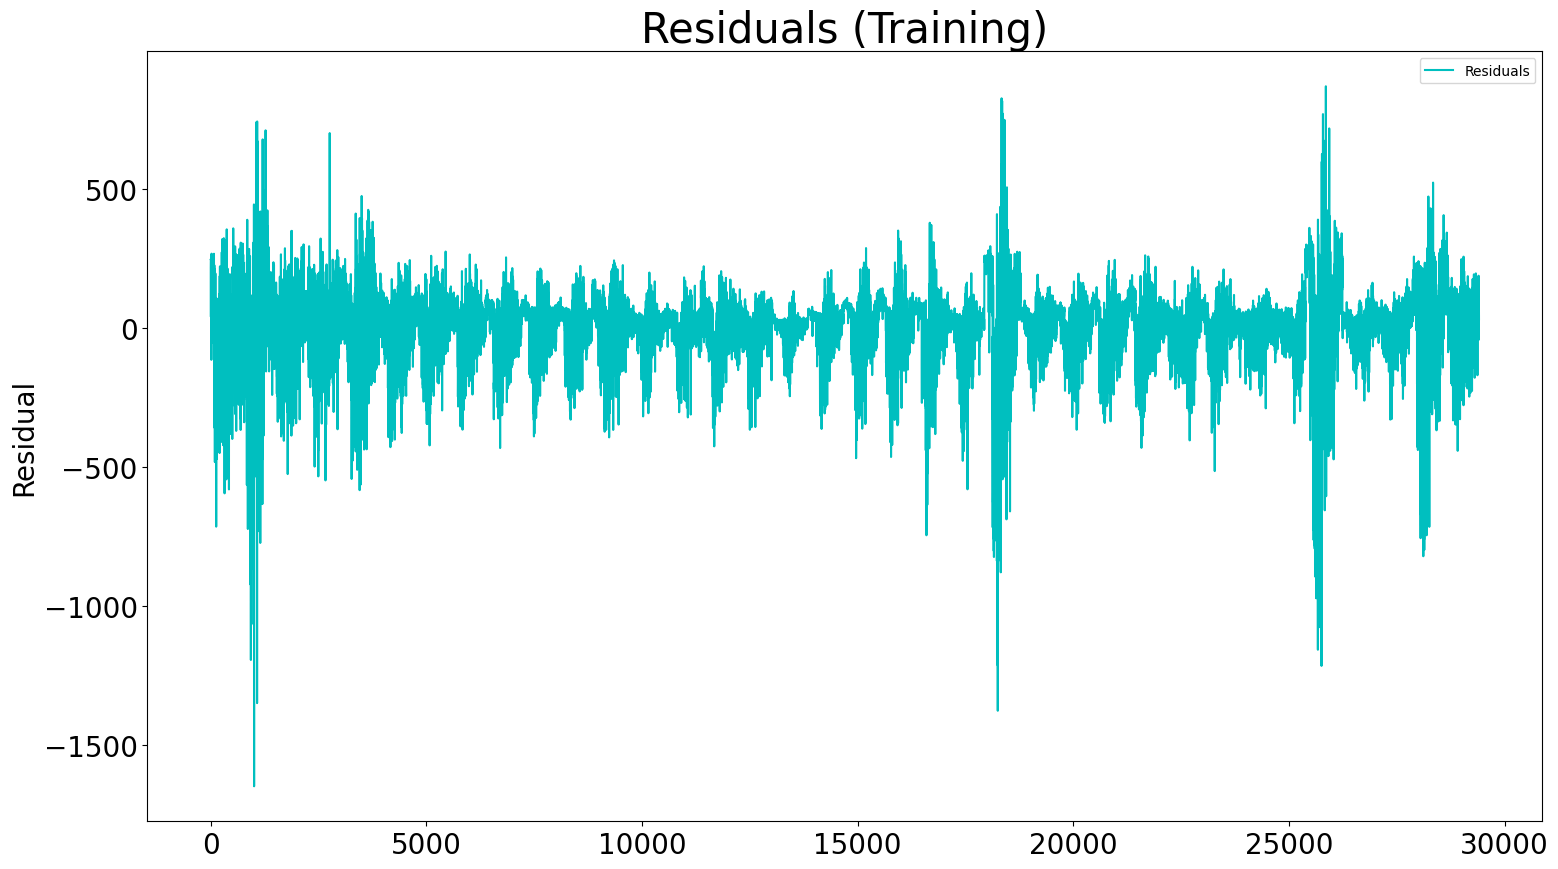

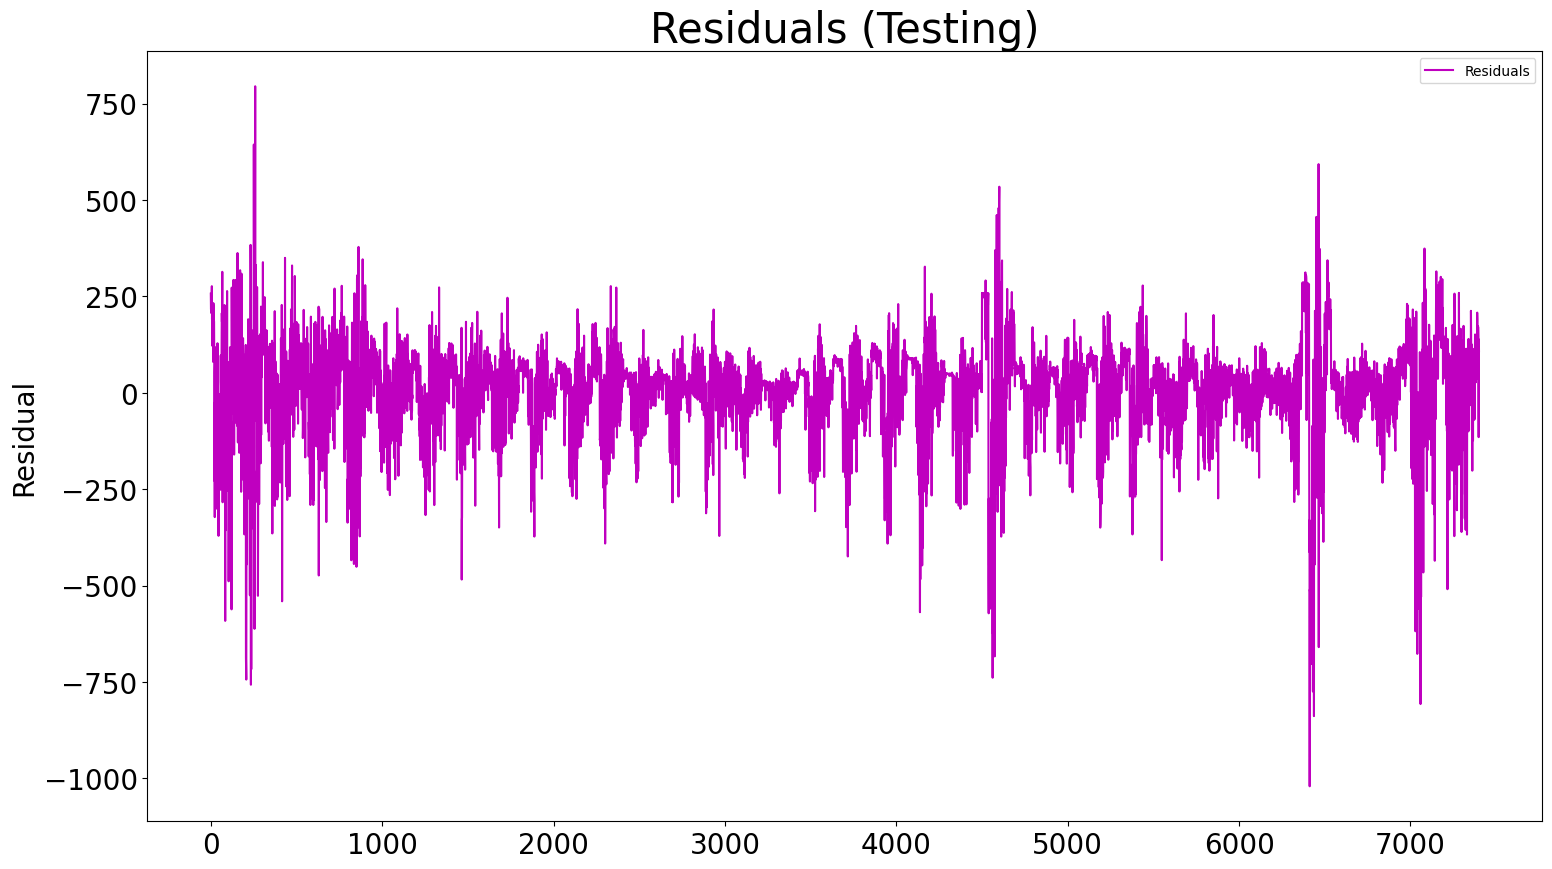

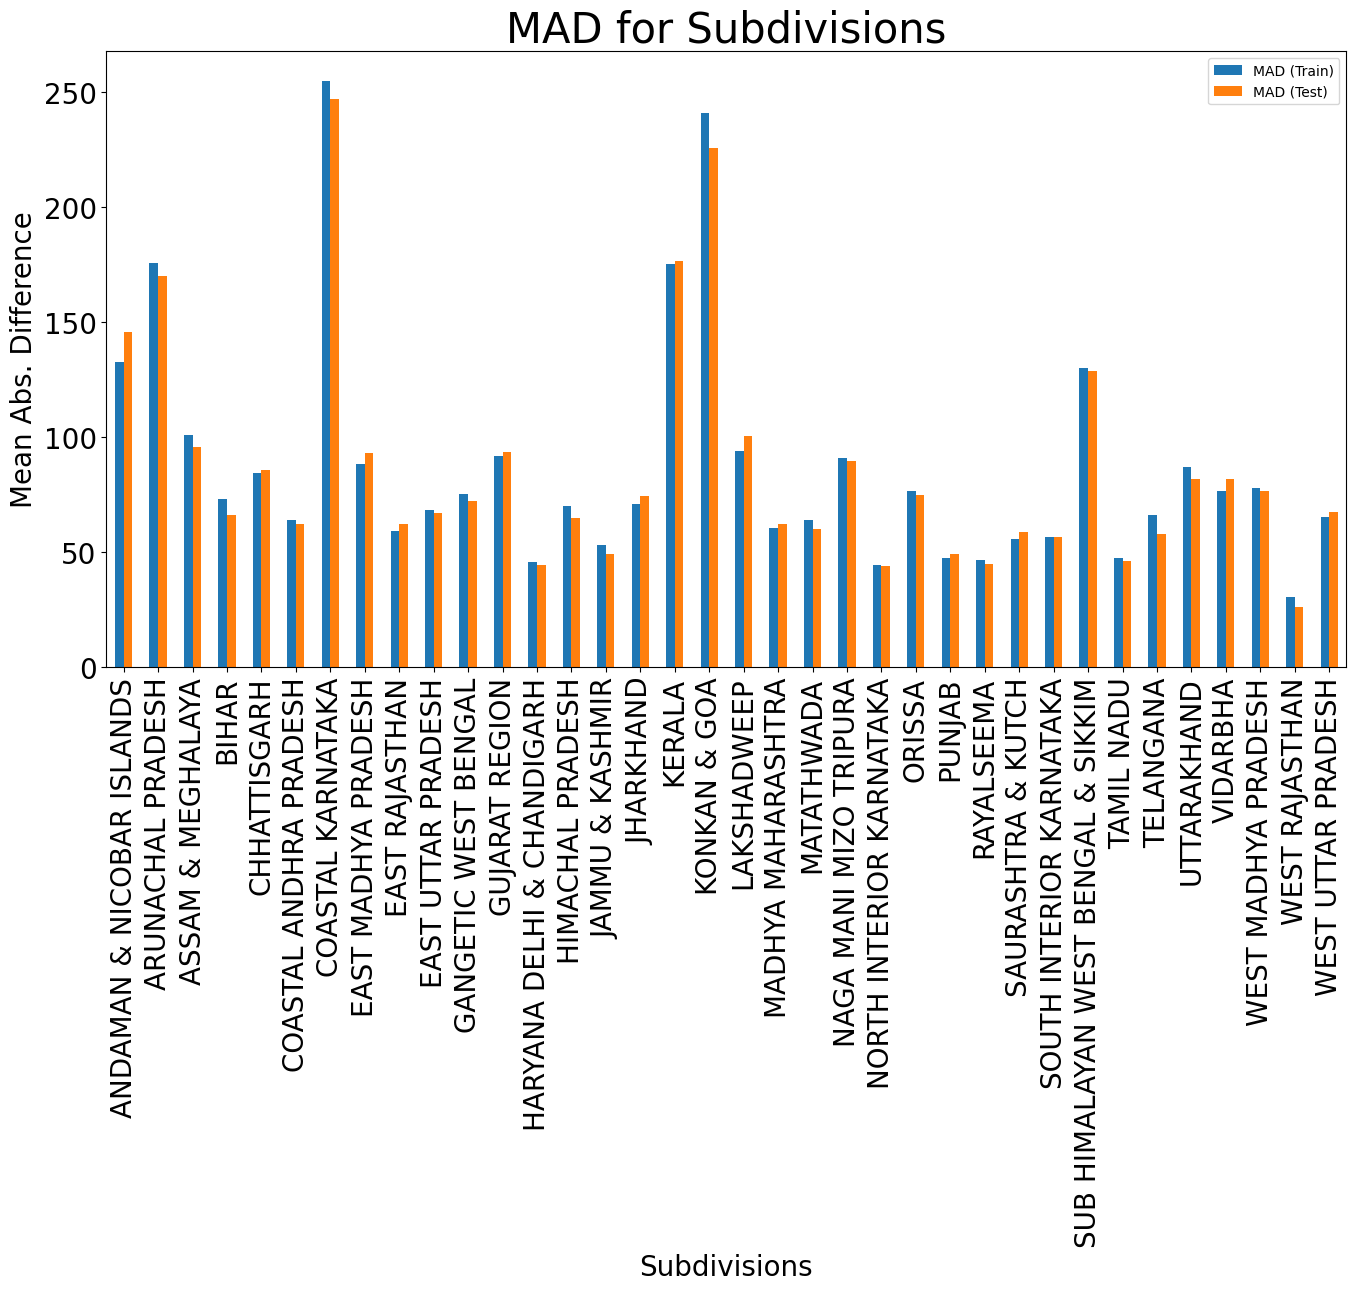

In [ ]:
#subdivs = df['SUBDIVISION'].unique()
#num_of_subdivs = subdivs.size

df_res_training = pd.DataFrame(columns=np.array(['Residuals']))
df_res_testing = pd.DataFrame(columns=np.array(['Residuals']))
list_mad_training = []
mean_abs_diff_training = 0
list_mad_testing = []
mean_abs_diff_testing = 0
for subd in subdivs:
    df1 = df[df['SUBDIVISION']==subd]
    df2 = df1[[months[0],months[1],months[2],months[3]]]
    df2.columns = np.array(['x1','x2','x3','x4'])
    for k in range(1,9):
        df3 = df1[[months[k],months[k+1],months[k+2],months[k+3]]]
        df3.columns = np.array(['x1','x2','x3','x4'])
        df2 = df2.append(df3)
    df2.index = range(df2.shape[0])
    msk = np.random.rand(len(df2)) < 0.8
    df_train = df2[msk]

    df_test = df2[~msk]
    df_train.index = range(df_train.shape[0])
    df_test.index = range(df_test.shape[0])
    reg = linear_model.LinearRegression()
    reg.fit(df_train.drop('x4',axis=1),df_train['x4'])

    predicted_values = reg.predict(df_train.drop('x4',axis=1))
    residuals = predicted_values-df_train['x4'].values
    df_res_training = df_res_training.append(pd.DataFrame(residuals,columns=np.array(['Residuals'])))
    mean_abs_diff_training = mean_abs_diff_training + np.sum(np.abs(residuals))
    list_mad_training.append(np.mean(np.abs(residuals)))

    predicted_values = reg.predict(df_test.drop('x4',axis=1))
    residuals = predicted_values-df_test['x4'].values
    df_res_testing = df_res_testing.append(pd.DataFrame(residuals,columns=np.array(['Residuals'])))
    mean_abs_diff_testing = mean_abs_diff_testing + np.sum(np.abs(residuals))
    list_mad_testing.append(np.mean(np.abs(residuals)))

    df_res_training.index = range(df_res_training.shape[0])
mean_abs_diff_training = mean_abs_diff_training/df_res_training.shape[0]
print('Overall MAD (Training): ' + str(mean_abs_diff_training))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res_training.plot.line(title='Residuals (Training)', color='c',ax=ax,fontsize=20)
#ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

df_res_testing.index = range(df_res_testing.shape[0])
mean_abs_diff_testing = mean_abs_diff_testing/df_res_testing.shape[0]
print('Overall MAD (Testing): ' + str(mean_abs_diff_testing))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res_testing.plot.line(title='Residuals (Testing)', color='m',ax=ax,fontsize=20)
#ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

pd_mad = pd.DataFrame(data=list_mad_training,columns=["MAD (Train)"])
pd_mad["MAD (Test)"] = list_mad_testing;
pd_mad['Subdivisions'] = subdivs;
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
#pd_mad.groupby('Subdivisions').mean().plot(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
pd_mad.groupby('Subdivisions').mean().plot.bar( width=0.5,title='MAD for Subdivisions', ax= ax, fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Mean Abs. Difference')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)